In [1]:
# The project is for finding a good strategy for reducing traffic related death
# While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. 
# Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
miles_driven = pd.read_csv('https://raw.githubusercontent.com/khullaal/Python_project/master/data/datasets/miles-driven.csv',delimiter = '|')
miles_driven.head()
# Date set contains state and Miles driven annually(In Millions)

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [4]:
road_accidents = pd.read_csv('https://raw.githubusercontent.com/khullaal/Python_project/master/data/datasets/road-accidents.csv')
road_accidents.head()
## Date set contains state wise fatal accidents and the reasons

,##### LICENSE #####
0,# This data set is modified from the original ...
1,# and it is released under CC BY 4.0 (https://...
2,##### COLUMN ABBREVIATIONS #####
3,# drvr_fatl_col_bmiles = Number of drivers inv...
4,# perc_fatl_speed = Percentage Of Drivers Invo...


In [5]:
# Cleaned Data of road_accidents is stored in car_acc

In [6]:
car_acc = pd.read_csv('https://raw.githubusercontent.com/khullaal/Python_project/master/data/datasets/road-accidents_clean.csv', delimiter = '|')
car_acc.head()
# drvr_fatl_col_bmiles : means fatal accidents column by miles
# perc_fatl_speed : percent of fatal accidents due to speeding
# perc_fatl_alcohol : percent of fatal accidents due to alcohol
# perc_fatl_1st_time : percent of fatal accidents due to 1st time accident

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [7]:
#Number of row as columns in car_acc

In [8]:
rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(
    rows_and_cols[0], rows_and_cols[1]))

There are 51 rows and 5 columns.



In [9]:
# Data information for the carr_acc dataframe
car_acc_information = car_acc.info
car_acc_information

<bound method DataFrame.info of                    state  drvr_fatl_col_bmiles  perc_fatl_speed  \
0                Alabama                  18.8               39   
1                 Alaska                  18.1               41   
2                Arizona                  18.6               35   
3               Arkansas                  22.4               18   
4             California                  12.0               35   
5               Colorado                  13.6               37   
6            Connecticut                  10.8               46   
7               Delaware                  16.2               38   
8   District of Columbia                   5.9               34   
9                Florida                  17.9               21   
10               Georgia                  15.6               19   
11                Hawaii                  17.5               54   
12                 Idaho                  15.3               36   
13              Illinois      

In [10]:
car_acc.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


In [11]:
# calculate summary statistics and produce a graphical overview of the data.
# The graphical overview is good to get a sense for the distribution of variables within the data

In [12]:
import seaborn as sns
%matplotlib inline

In [13]:
sum_stat_car = car_acc.describe()
print(sum_stat_car)

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


In [14]:
# Creating a pairwise scatter plot to explore the data

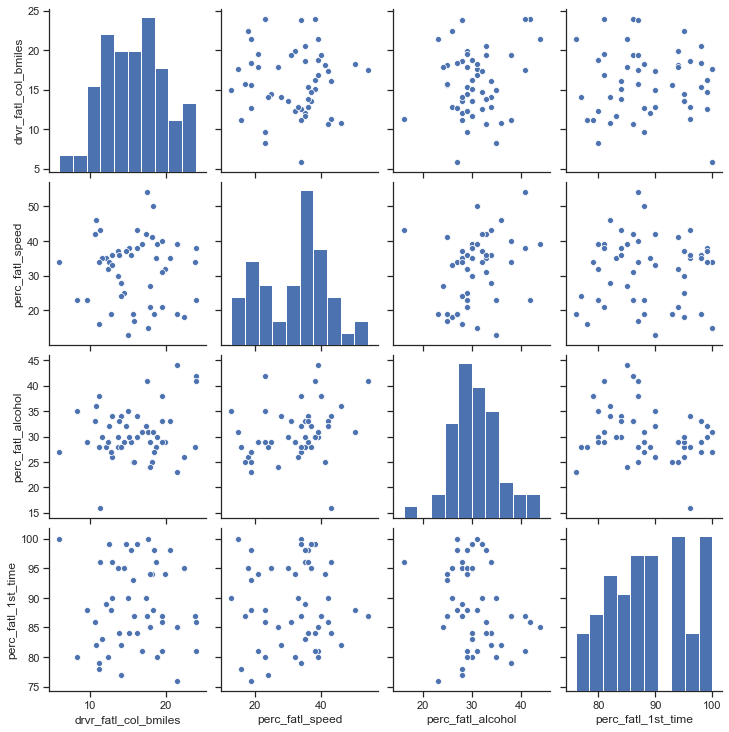

In [15]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(car_acc);

In [16]:
# Further quantifying the pairwise relationships observed in the scatter plots,computing the Pearson correlation coefficient matrix. 
# The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds used:

# 0.2 = weak
# 0.5 = medium
# 0.8 = strong
# 0.9 = very strong
# Computing the correlation coefficent for all column pairs

In [17]:
corr_columns = car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


In [18]:
# From the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row).
# But in addition, we also see that some of the features are correlated with each other, for instance, speeding and alcohol consumption are positively correlated. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features.
# This can be done using multivariate linear regression.

# Both the multivariate regression and the correlation measure how strongly the features are associated with the outcome (fatal accidents).
# When comparing the regression coefficients with the correlation coefficients, we will see that they are slightly different.
# The reason for this is that the multiple regression computes the association of a feature with an outcome, given the association with all other features, which is not accounted for when calculating the correlation coefficients.



In [19]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = car_acc[['perc_fatl_speed','perc_fatl_alcohol', 'perc_fatl_1st_time' ]] 
target = car_acc['drvr_fatl_col_bmiles']

# Create a linear regression object
reg = linear_model.LinearRegression(fit_intercept = True)

# Fit a multivariate linear regression model
reg.fit(features,target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

In [20]:
# We have learned that alcohol consumption is weakly associated with the number of fatal accidents across states.
# This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents. 
# But there are also associations between alcohol consumptions and the other two features, so it might be worth trying to split the states in a way that accounts for all three features.

# One way of clustering the data is to use Principle component Analysis to visualize data in reduced dimensional space where we can try to pick up patterns by eye. 
# PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).

# Using the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.

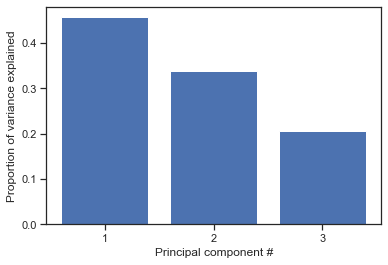

In [21]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Importing the PCA class function from sklearn
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Ploting the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3]);



In [22]:
# The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation from all three features: speeding, alcohol influence, and first-time accidents.
# This enables us  to discern patterns in the data with the goal to find groups of similar states. 
# We are creating a scatter plot of the first principle components and explore how the states cluster together in this visualization.

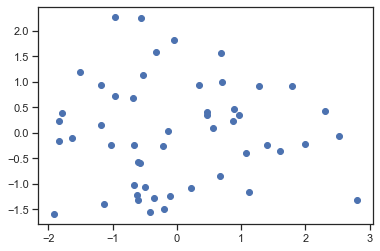

In [23]:
# Transforming the scaled features using two principal components
pca = PCA(n_components =2)
p_comps = pca.fit_transform(features_scaled)

# Extracting the first and second component to use for the scatter plot
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

# Ploting the first two principal components in a scatter plot
plt.scatter(p_comp1,p_comp2);

In [24]:
# It is not entirely clear from the PCA scatter plot how many groups in which the states cluster.
# To assist with identifying a reasonable number of clusters, we are using KMeans clustering by creating a scree plot and finding the "elbow", which is an indication of when the addition of more clusters does not add much explanatory power.

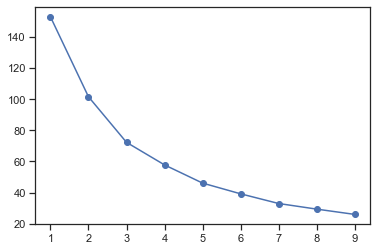

In [25]:
# Importing KMeans from sklearn
from sklearn.cluster import KMeans

# loop used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o');

In [26]:
# Since there wasn't a clear elbow in the scree plot, assigning the states to either two or three clusters is a reasonable choice, and we will resume our analysis using three clusters.
# Let's see how the PCA scatter plot looks if we color the states according to the cluster to which they are assigned.

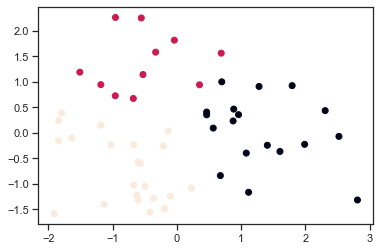

In [27]:
# Creating a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters=3, random_state=8)

# Fit the data to the `km` object
km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 

plt.scatter(p_comps[:, 0], p_comps[:, 1], c=km.labels_);

In [28]:
# Thus far, we have used both our visual interpretation of the data and the KMeans clustering algorithm to reveal patterns in the data, but what do these patterns mean?

# Remember that the information we have used to cluster the states into three distinct groups are the percentage of drivers speeding, under alcohol influence and that has not previously been involved in an accident. 
# We used these clusters to visualize how the states group together when considering the first two principal components.
# This is good for us to understand structure in the data, but not always easy to understand, especially not if the findings are to be communicated to a non-specialist audience.

# A reasonable next step in our analysis is to explore how the three clusters are different in terms of the three features that we used for clustering.
# Instead of using the scaled features, we return to using the unscaled features to help us interpret the differences.

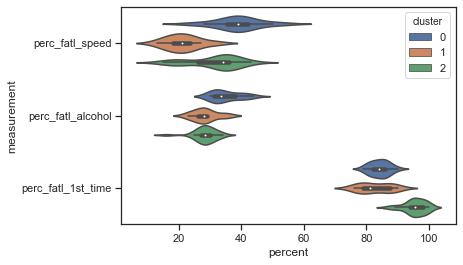

In [29]:
# Creating a new column with the labels from the KMeans clustering
car_acc['cluster'] = km.labels_

# Reshaping the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars='cluster', var_name='measurement', 
        value_name='percent', value_vars=('perc_fatl_speed','perc_fatl_alcohol', 'perc_fatl_1st_time'))

# Creating a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x = 'percent',y='measurement',data = melt_car , hue ='cluster');

In [30]:
# Now it is clear that different groups of states may require different interventions.
# Since resources and time are limited, it is useful to start off with an intervention in one of the three groups first. Which group would this be?

# To determine this, we will include data on how many miles are driven in each state, because this will help us to compute the total number of fatal accidents in each state. Data on miles driven is available in another tab-delimited text file.

# We will assign this new information to a column in the DataFrame and create a violin plot for how many total fatal traffic accidents there are within each state cluster.

num_drvr_fatl_col                        
                    count        mean         sum
cluster                                          
0                      18  911.406439  16405.3159
1                      11  860.505945   9465.5654
2                      22  898.378595  19764.3291

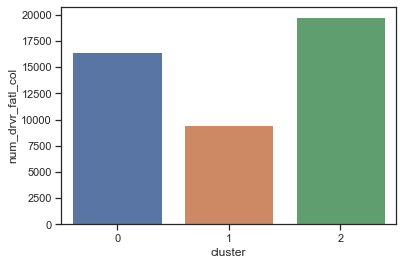

In [31]:
# Merging the `car_acc` DataFrame with the `miles_driven` DataFrame
car_acc_miles = pd.merge(car_acc,miles_driven,on ='state', how = 'inner')

# Creating a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatl_col'] = car_acc_miles['drvr_fatl_col_bmiles'] * car_acc_miles['million_miles_annually']/1000

# Creating a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data= car_acc_miles, estimator=sum, ci=None);

# Calculating the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby('cluster')['state','num_drvr_fatl_col'].agg(['count','mean','sum'])
count_mean_sum

In [32]:
# Based on all the work and model and clustering we shall focus on Cluster 2 to derive a strategy to reduce the traffic related deaths in the US